In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle('../Sentiment Analysis/comments_fin_df.pkl')
df = df[df['Symbol'] != '']

In [3]:
%%time
GME_df = df[df['Symbol'] == 'GME']
AMC_df = df[df['Symbol'] == 'AMC']
BB_df = df[df['Symbol'] == 'BB']
PLTR_df = df[df['Symbol'] == 'PLTR']
TSLA_df = df[df['Symbol'] == 'TSLA']
RH_df = df[df['Symbol'] == 'RH']
NOK_df = df[df['Symbol'] == 'NOK']
RKT_df = df[df['Symbol'] == 'RKT']
AMD_df = df[df['Symbol'] == 'AMD']
TLRY_df = df[df['Symbol'] == 'TLRY']

CPU times: user 997 ms, sys: 41.8 ms, total: 1.04 s
Wall time: 1.04 s


In [4]:
%%time
GME_body_list = GME_df['body'].tolist()
AMC_body_list = AMC_df['body'].tolist()
BB_body_list = BB_df['body'].tolist()
PLTR_body_list = PLTR_df['body'].tolist()
TSLA_body_list = TSLA_df['body'].tolist()
RH_body_list = RH_df['body'].tolist()
NOK_body_list = NOK_df['body'].tolist()
RKT_body_list = RKT_df['body'].tolist()
AMD_body_list = AMD_df['body'].tolist()
TLRY_body_list = TLRY_df['body'].tolist()

CPU times: user 24.6 ms, sys: 1.13 ms, total: 25.7 ms
Wall time: 25.6 ms


In [5]:
%%time
GME_body = ' '.join(GME_body_list)
AMC_body = ' '.join(AMC_body_list)
BB_body = ' '.join(BB_body_list)
PLTR_body = ' '.join(PLTR_body_list)
TSLA_body = ' '.join(TSLA_body_list)
RH_body = ' '.join(RH_body_list)
NOK_body = ' '.join(NOK_body_list)
RKT_body = ' '.join(RKT_body_list)
AMD_body = ' '.join(AMD_body_list)
TLRY_body = ' '.join(TLRY_body_list)

CPU times: user 197 ms, sys: 43.5 ms, total: 240 ms
Wall time: 239 ms


In [6]:
%%time
body_list = [GME_body, AMC_body, BB_body, PLTR_body, TSLA_body, RH_body, NOK_body, RKT_body, AMD_body, TLRY_body]

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs


In [7]:
len(body_list)

10

In [8]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
## Count Vectorizer
vect = CountVectorizer(stop_words='english')
vects = vect.fit_transform(body_list)

CPU times: user 8.69 s, sys: 1.82 s, total: 10.5 s
Wall time: 9.32 s


In [9]:
data = pd.DataFrame(vects.toarray(), columns=vect.get_feature_names_out())
data_matrix = data.T
data_matrix.columns = ['GME', 'AMC', 'BB', 'PLTR', 'TSLA', 'RH', 'NOK', 'RKT', 'AMD', 'TLRY']
data_matrix['total_count'] = data_matrix.sum(axis=1)
data_matrix

,GME,AMC,BB,PLTR,TSLA,RH,NOK,RKT,AMD,TLRY,total_count
00,1759,706,294,201,140,198,107,120,57,93,3675
000,8583,1781,576,280,814,582,245,143,121,93,13218
0000,11,2,1,1,0,0,0,1,0,0,16
00000,1,0,0,0,0,0,0,0,0,0,1
000000,4,0,1,0,0,0,0,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...
𝗸𝘆𝘀,0,0,0,0,0,1,0,0,0,0,1
𝘁𝗵𝗲𝗿𝗲,0,0,0,0,0,0,1,0,0,0,1
𝘨𝘳𝘦𝘢𝘵𝘦𝘴𝘵,1,0,0,0,0,0,0,0,0,0,1
𝙝𝙪𝙜𝙚,0,0,0,0,1,0,0,0,0,0,1


In [10]:
# Top words
term_document_matrix = data_matrix.sort_values(by='total_count', ascending=False)
term_document_matrix

,GME,AMC,BB,PLTR,TSLA,RH,NOK,RKT,AMD,TLRY,total_count
gme,626789,45478,16279,3728,2541,7990,6509,4802,609,676,715401
amc,53761,263243,12986,596,358,1868,7545,614,333,309,341613
bb,17506,12773,165854,1254,333,732,5119,180,175,346,204272
buy,88935,32423,14135,5905,5864,11427,5972,2701,2438,2013,171813
just,79417,24115,12350,6697,7144,12060,3946,3437,3007,2341,154514
...,...,...,...,...,...,...,...,...,...,...,...
deeaayyuumm,0,1,0,0,0,0,0,0,0,0,1
nuggetlover1999,1,0,0,0,0,0,0,0,0,0,1
dedudction,1,0,0,0,0,0,0,0,0,0,1
nuggetssssss,0,1,0,0,0,0,0,0,0,0,1


In [11]:
# term_document_matrix.to_pickle('term_document_matrix.pkl')
term_document_matrix = term_document_matrix.drop(columns=['total_count'])
term_document_matrix

,GME,AMC,BB,PLTR,TSLA,RH,NOK,RKT,AMD,TLRY
gme,626789,45478,16279,3728,2541,7990,6509,4802,609,676
amc,53761,263243,12986,596,358,1868,7545,614,333,309
bb,17506,12773,165854,1254,333,732,5119,180,175,346
buy,88935,32423,14135,5905,5864,11427,5972,2701,2438,2013
just,79417,24115,12350,6697,7144,12060,3946,3437,3007,2341
...,...,...,...,...,...,...,...,...,...,...
deeaayyuumm,0,1,0,0,0,0,0,0,0,0
nuggetlover1999,1,0,0,0,0,0,0,0,0,0
dedudction,1,0,0,0,0,0,0,0,0,0
nuggetssssss,0,1,0,0,0,0,0,0,0,0


In [12]:
term_document_matrix.to_pickle('term_document_matrix.pkl')

In [28]:
# Cosine Similarity between Documents
import math

# Cosine Similarity function
def cosine_similarity(a,b):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(a)):
        x = a[i]; y = b[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

# Save the similarity index between the documents
def pair(s):
    for i, v1 in enumerate(s):
        for j in range(i+1, len(s)):
            yield [v1, s[j]]

dic={}
for (a,b) in list(pair(['GME', 'AMC', 'BB', 'PLTR', 'TSLA', 'RH', 'NOK', 'RKT', 'AMD', 'TLRY'])):
    dic[(a,b)] = cosine_similarity(term_document_matrix[a].tolist(), term_document_matrix[b].tolist())

# Print the cosine similarity
dic

{('GME', 'AMC'): 0.34117544318315574,
 ('GME', 'BB'): 0.21292011206171174,
 ('GME', 'PLTR'): 0.13805548526086722,
 ('GME', 'TSLA'): 0.13739857217653695,
 ('GME', 'RH'): 0.26551693934345005,
 ('GME', 'NOK'): 0.151589060837327,
 ('GME', 'RKT'): 0.23507753256236566,
 ('GME', 'AMD'): 0.1264859285660242,
 ('GME', 'TLRY'): 0.11824772638151305,
 ('AMC', 'BB'): 0.20545845709464086,
 ('AMC', 'PLTR'): 0.0870787958487049,
 ('AMC', 'TSLA'): 0.08935623269070925,
 ('AMC', 'RH'): 0.16149072863097277,
 ('AMC', 'NOK'): 0.17628189821298917,
 ('AMC', 'RKT'): 0.12429910466208871,
 ('AMC', 'AMD'): 0.0949630187163324,
 ('AMC', 'TLRY'): 0.08760534003605773,
 ('BB', 'PLTR'): 0.09081139954747416,
 ('BB', 'TSLA'): 0.07789249521631897,
 ('BB', 'RH'): 0.11849084842610987,
 ('BB', 'NOK'): 0.14833311158854331,
 ('BB', 'RKT'): 0.09398148434273042,
 ('BB', 'AMD'): 0.08090347031705043,
 ('BB', 'TLRY'): 0.08018712759684345,
 ('PLTR', 'TSLA'): 0.09342130121315904,
 ('PLTR', 'RH'): 0.10336291391156956,
 ('PLTR', 'NOK'): 

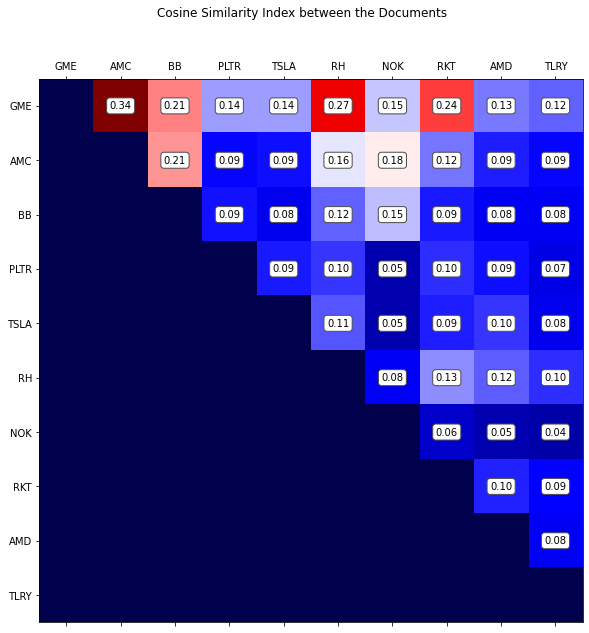

In [59]:
import numpy as np
documents= ['GME', 'AMC', 'BB', 'PLTR', 'TSLA', 'RH', 'NOK', 'RKT', 'AMD', 'TLRY']
final_df = pd.DataFrame(np.asarray([[(dic[(x,y)] if (x,y) in dic else 0) for y in documents] for x in documents]))
final_df.columns =  documents
final_df.index = documents

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(documents)), labels=documents)
ax.set_yticks(np.arange(len(documents)), labels=documents)
ax.matshow(final_df, cmap='seismic')
for (i, j), z in np.ndenumerate(final_df):
    if z != 0 :
        ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    else:
        None
fig.suptitle('Cosine Similarity Index between the Documents')
fig.set_size_inches(10,10)
plt.xticks(np.arange(len(documents)))
plt.yticks(np.arange(len(documents)))
plt.show()

In [35]:
final_df

,GME,AMC,BB,PLTR,TSLA,RH,NOK,RKT,AMD,TLRY
GME,0.0,0.341175,0.212920,0.138055,0.137399,0.265517,0.151589,0.235078,0.126486,0.118248
AMC,0.0,0.000000,0.205458,0.087079,0.089356,0.161491,0.176282,0.124299,0.094963,0.087605
BB,0.0,0.000000,0.000000,0.090811,0.077892,0.118491,0.148333,0.093981,0.080903,0.080187
PLTR,0.0,0.000000,0.000000,0.000000,0.093421,0.103363,0.047386,0.100674,0.089793,0.074044
TSLA,0.0,0.000000,0.000000,0.000000,0.000000,0.114570,0.046732,0.094686,0.103929,0.078220
RH,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.082152,0.132005,0.116922,0.100137
NOK,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060489,0.049149,0.044831
RKT,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097149,0.086472
AMD,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080923
TLRY,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
# Topic Modelling
import gensim
from gensim.utils import simple_preprocess
import nltk
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def sent_to_words(sentences):
    for sentence in sentences:
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data = body_list
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

[nltk_data] Downloading package stopwords to /Users/isaac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.054*"gme" + 0.022*"amc" + 0.010*"buy" + 0.009*"like" + 0.008*"stock" + 0.008*"pltr" + 0.007*"shares" + 0.006*"tsla" + 0.006*"bb" + 0.006*"get"'), (1, '0.044*"bb" + 0.042*"gme" + 0.028*"amc" + 0.009*"buy" + 0.009*"like" + 0.008*"shares" + 0.006*"stock" + 0.006*"money" + 0.006*"get" + 0.006*"people"'), (2, '0.046*"gme" + 0.025*"nok" + 0.012*"buy" + 0.011*"amc" + 0.010*"pltr" + 0.010*"rh" + 0.009*"bb" + 0.009*"shares" + 0.009*"like" + 0.006*"get"'), (3, '0.030*"nok" + 0.025*"gme" + 0.020*"bb" + 0.013*"tsla" + 0.012*"amc" + 0.010*"buy" + 0.008*"rkt" + 0.007*"stock" + 0.007*"like" + 0.006*"amd"'), (4, '0.037*"amc" + 0.032*"bb" + 0.024*"gme" + 0.015*"buy" + 0.009*"nok" + 0.009*"like" + 0.009*"shares" + 0.007*"going" + 0.007*"tsla" + 0.007*"stock"'), (5, '0.051*"gme" + 0.030*"amc" + 0.013*"pltr" + 0.012*"buy" + 0.009*"shares" + 0.007*"stock" + 0.007*"like" + 0.006*"get" + 0.006*"money" + 0.006*"hold"'), (6, '0.061*"gme" + 0.011*"amc" + 0.011*"buy" + 0.009*"shares" + 0.008*"rh" + 0.007